In [2]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from sklearn import linear_model

In [7]:
#データの取得
data = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(data)
txt = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names"
urllib.request.urlretrieve(txt, './wine.names')

# with open('./wine.names') as f:
#     for line in f:
#         print(line)

('./wine.names', <http.client.HTTPMessage at 0x1a20e9bd68>)

In [8]:
#indexを説明からつける
#アルコール,リンゴ酸,灰,灰分のアルカリ度,マグネシウム,総フェノール,フラバノイド
#非フラバノイドフェノール,プロアントシアニン,色の濃さ,色相,希釈ワインのOD 280 / OD 315,プロリン
columns_name = ['class','Alcohol','Malic_acid','Ash',
                'Alcalinity_of_ash','Magnesium','Total_phenols',
                'Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                'Color_intensity','Hue','OD280_OD315','Proline']
wine.columns = columns_name
pd.set_option('display.max_rows', 5)
display(wine)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [6]:
# 線形回帰インスタンス
REG = linear_model.LinearRegression()

回帰係数:  [0.13833931]
切片:  0.5423513772050061
決定係数 0.00999259651850648
相関係数 (0.09996297573855276, 0.18556400432463188)
回帰係数:  [0.07175021]
切片:  1.4338594307459078
決定係数 0.04450597608033302
相関係数 (0.21096439529061028, 0.004823266909080774)
回帰係数:  [0.22039368]
切片:  -0.5714633960159854
決定係数 0.08096473379061475
相関係数 (0.2845430262554591, 0.0001238245400329395)
回帰係数:  [1.57456877]
切片:  -15.404628390902005
決定係数 0.3001757034619045
相関係数 (0.5478829286096659, 2.9655579941769435e-15)


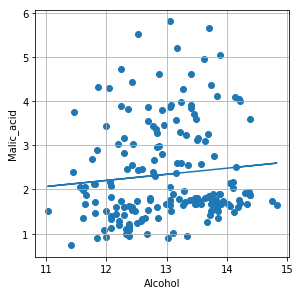

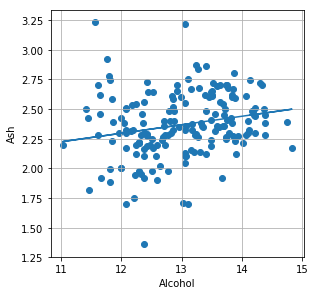

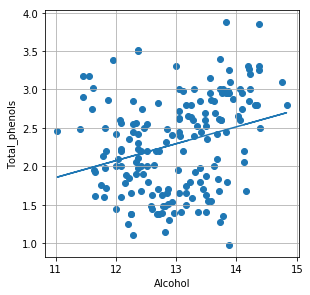

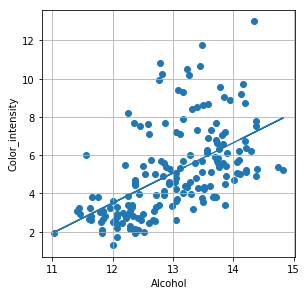

In [20]:
p=1
reg_score = 0
strong_relation = ""
attributes = ['Malic_acid', 'Ash', 'Total_phenols', 'Color_intensity']
for w in attributes:
    #説明変数
    X = wine.loc[:,['Alcohol']].values
    
    #目的変数
    Y = wine[w].values
    
    #予測モデルを計算、aとbを算出
    REG.fit(X,Y)
    
    #回帰係数
    print("回帰係数: ",REG.coef_)
    
    #切片
    print("切片: ", REG.intercept_)
    
    #グラフの大きさを指定する
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,p)
    plt.grid(True)
    plt.xlabel('Alcohol')
    plt.ylabel(w)
    plt.scatter(X,Y)
    plt.plot(X, REG.predict(X))
    
    print('決定係数', REG.score(X,Y))
    reg_score_tmp = abs(REG.score(X,Y))
    if (reg_score < reg_score_tmp):
        reg_score = reg_score_tmp
        strong_relation = w
    print('相関係数', sp.stats.pearsonr(wine['Alcohol'], wine[w]))

In [21]:
print ('もっとも相関があるのは「アルコール」と「{}」'.format(strong_relation))

もっとも相関があるのは「アルコール」と「Color_intensity」


In [22]:
print('相関係数は', sp.stats.pearsonr(wine['Alcohol'], wine[strong_relation]))

相関係数は (0.5478829286096659, 2.9655579941769435e-15)
